# Work with contours
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_table_of_contents_contours/py_table_of_contents_contours.html

one of home work in `src/polygon_test.py`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.simplefilter('ignore')

import gc

from os import path
import sys
sys.path.append(path.abspath('..'))

In [3]:
from pprint import pprint

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from src.config import DATA_PATH
from src.utils import plot_images

# Get countours

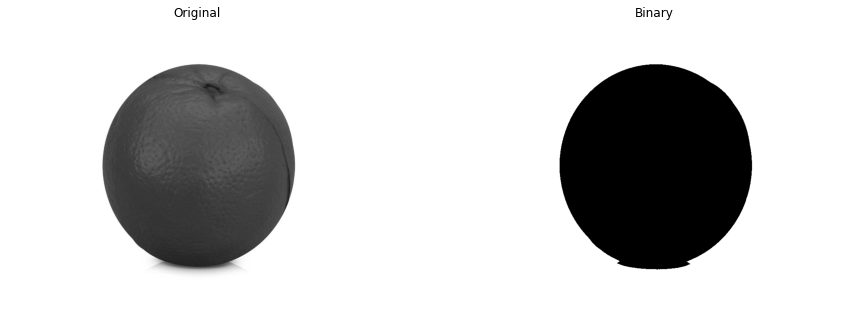

In [4]:
image = cv2.imread(path.join(DATA_PATH, "orange.jpg"), 0)
ret, image_binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plot_images([image, image_binary], names=["Original", "Binary"],
            figsize=(15, 10), imshow_kwargs={"cmap": plt.cm.gray}
           )

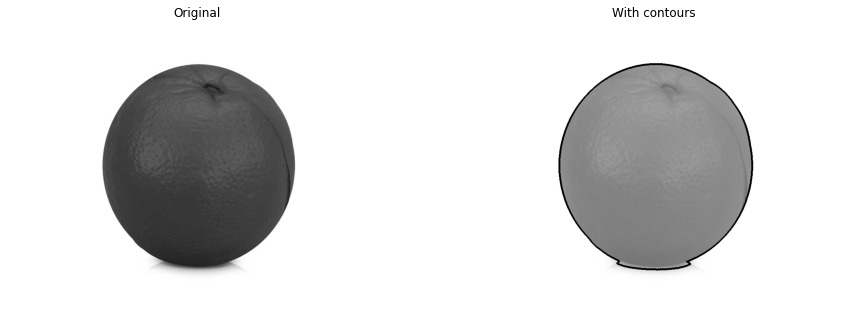

In [5]:
contours, hierarchy = cv2.findContours(image_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = cv2.drawContours(image.copy(), contours, 1, (0,), 3)

plot_images([image, image_with_contours], names=["Original", "With contours"],
            figsize=(15, 10), imshow_kwargs={"cmap": plt.cm.gray}
           )

# Features

{'m00': 213571.0,
 'm01': 80690034.83333333,
 'm02': 34355526858.666664,
 'm03': 15913176547074.352,
 'm10': 107476627.66666666,
 'm11': 40574436158.58333,
 'm12': 17263873324350.717,
 'm20': 57493025154.5,
 'm21': 21682000281164.95,
 'm30': 32362651949088.902,
 'mu02': 3869731870.5617943,
 'mu03': 9115331806.763672,
 'mu11': -31698710.816207886,
 'mu12': -1114095857.1745605,
 'mu20': 3406910960.160431,
 'mu21': -7744400044.112793,
 'mu30': 1127868208.1015625,
 'nu02': 0.08483915064213851,
 'nu03': 0.00043243095932248894,
 'nu11': -0.0006949555659285056,
 'nu12': -5.285266082554755e-05,
 'nu20': 0.07469236676892599,
 'nu21': -0.0003673940138929324,
 'nu30': 5.3506020576979776e-05}


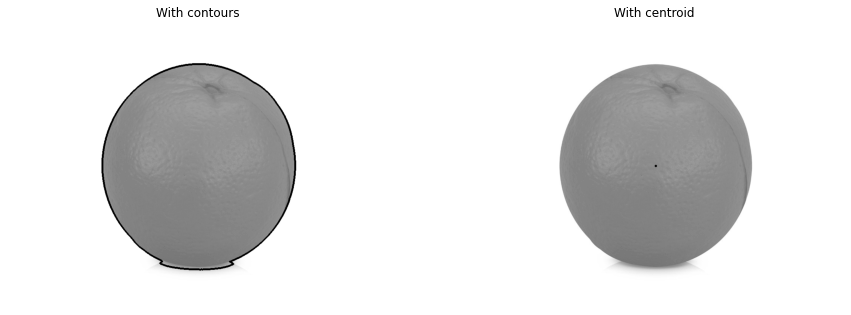

In [6]:
# moments and centroid
contour = contours[1]
moments = cv2.moments(contour)
pprint(moments)

cx, cy = int(moments["m10"]/moments["m00"]), int(moments["m01"]/moments["m00"])

image_with_centroid = image.copy()
image_with_centroid = cv2.circle(image.copy(), (cx, cy), 3, (0,), -1)

plot_images([image_with_contours, image_with_centroid], 
            names=["With contours", "With centroid"],
            figsize=(15, 10), imshow_kwargs={"cmap": plt.cm.gray})

In [7]:
# area, equal m["mo0"]
area = cv2.contourArea(contour)
print(area, moments["m00"])

213571.0 213571.0


In [8]:
# perimetr
perimetr_closed = cv2.arcLength(contour, True)
perimetr_not_closed = cv2.arcLength(contour, False)
print(perimetr_closed, perimetr_not_closed)

1764.3271123170853 1755.3271123170853


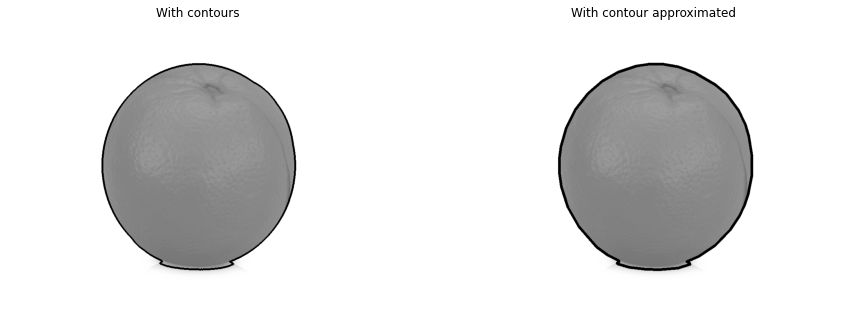

In [9]:
# approximation
epsilon = 0.001 * perimetr_closed
contour_approximated = cv2.approxPolyDP(contour, epsilon, True)

image_with_contour_approxiamted = cv2.drawContours(image.copy(),
                                                   [contour_approximated],
                                                   -1, (0,), 5
                                                  )

plot_images([image_with_contours, image_with_contour_approxiamted], 
            names=["With contours", "With contour approximated"],
            figsize=(15, 10), imshow_kwargs={"cmap": plt.cm.gray})

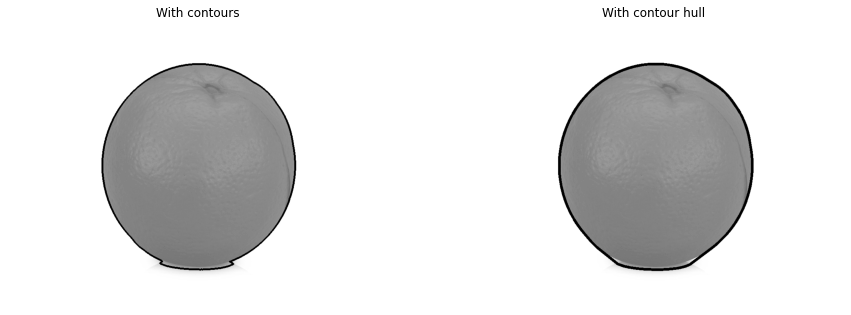

In [10]:
# convex hull
contour_hull = cv2.convexHull(contour)
image_with_contour_hull = cv2.drawContours(image.copy(),
                                           [contour_hull],
                                           -1, (0,), 5
                                          )
plot_images([image_with_contours, image_with_contour_hull], 
            names=["With contours", "With contour hull"],
            figsize=(15, 10), imshow_kwargs={"cmap": plt.cm.gray})

In [11]:
# check convexity
print(cv2.isContourConvex(contour))
print(cv2.isContourConvex(contour_hull))

False
True


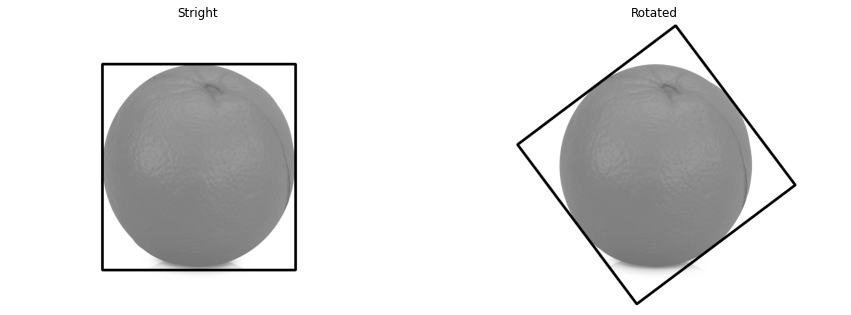

In [12]:
# rectangles
# stright
x, y, width, height = cv2.boundingRect(contour)
image_with_straight_rectangle = cv2.rectangle(image.copy(), (x, y), 
                                              (x + width, y + height),
                                              (0,), 5
                                             )

# rotated
rectangle = cv2.minAreaRect(contour)
box = cv2.boxPoints(rectangle).astype(np.int0)
image_with_rotated_rectangle = cv2.drawContours(image.copy(), [box],
                                                -1, (0,), 5)

plot_images([image_with_straight_rectangle, image_with_rotated_rectangle], 
            names=["Stright", "Rotated"],
            figsize=(15, 10), imshow_kwargs={"cmap": plt.cm.gray})

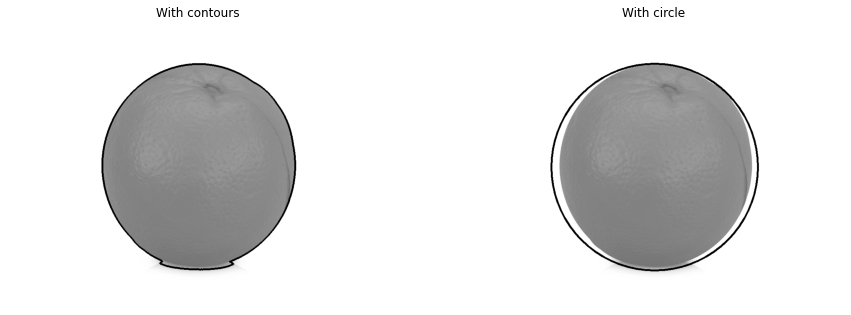

In [13]:
# circle
(x, y), radius = cv2.minEnclosingCircle(contour)
center = (int(x), int(y))
radius = int(radius)
image_with_circle = cv2.circle(image.copy(), center, radius, (0), 3)

plot_images([image_with_contours, image_with_circle], 
            names=["With contours", "With circle"],
            figsize=(15, 10), imshow_kwargs={"cmap": plt.cm.gray})

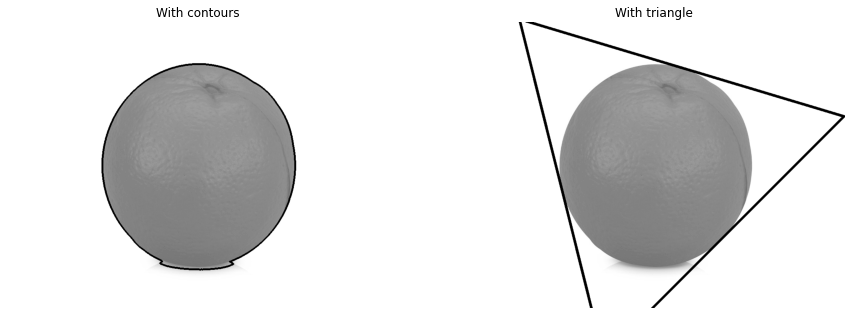

In [14]:
# triangle
_, contour_triangle = cv2.minEnclosingTriangle(contour)

image_with_triangle = cv2.drawContours(image.copy(), [contour_triangle.astype(int)],
                                                -1, (0,), 5)
plot_images([image_with_contours, image_with_triangle], 
            names=["With contours", "With triangle"],
            figsize=(15, 10), imshow_kwargs={"cmap": plt.cm.gray})

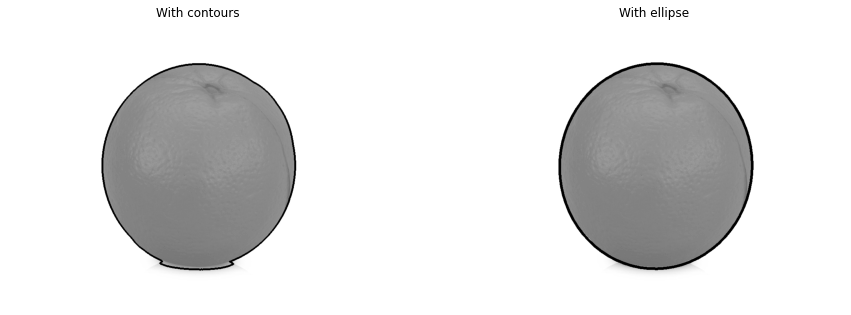

In [15]:
# ellipse
contour_ellipse = cv2.fitEllipse(contour)
image_with_ellipse = cv2.ellipse(image.copy(), contour_ellipse, (0,), 5)

plot_images([image_with_contours, image_with_ellipse], 
            names=["With contours", "With ellipse"],
            figsize=(15, 10), imshow_kwargs={"cmap": plt.cm.gray})

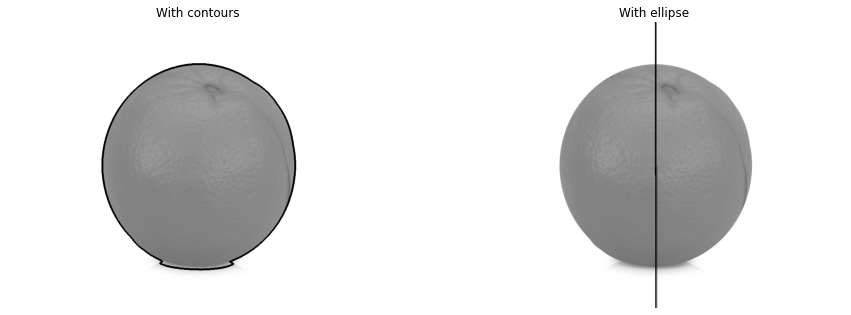

In [16]:
# line
row, cols = image.shape[:2]
(vx, vy, x, y) = cv2.fitLine(contour, cv2.DIST_L2, 0, 0, 0.01, 0.01)
lefty = int((-x * vy / vx) + y)
righty = int(((cols - x) * vy / vx) + y)
image_with_line = cv2.line(image.copy(), (cols - 1, righty), (0, lefty), 
                           (0, ), 2)

plot_images([image_with_contours, image_with_line], 
            names=["With contours", "With ellipse"],
            figsize=(15, 10), imshow_kwargs={"cmap": plt.cm.gray})

# Properties

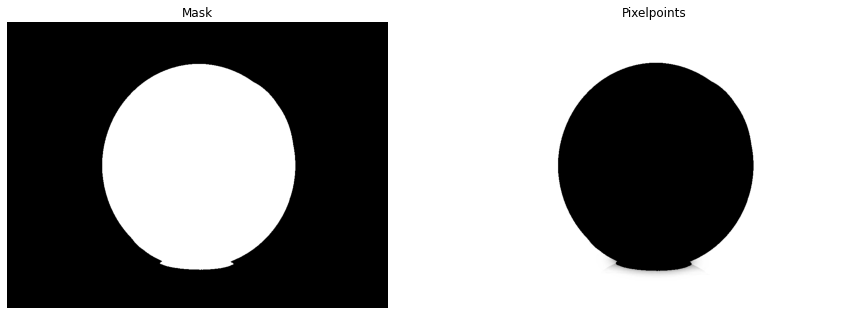

In [17]:
# mask and pixelpoints
mask = np.zeros_like(image, np.uint8)
mask = cv2.drawContours(mask, [contour], -1, 255, -1)

pixelpoints = np.array(np.nonzero(mask)).T
mask_by_pixels = image.copy()
for x, y in pixelpoints:
    mask_by_pixels = cv2.circle(mask_by_pixels, (y, x), 3, 127, 1)

plot_images([mask, mask_by_pixels], names=["Mask", "Pixelpoints"],
            figsize=(15, 10), imshow_kwargs={"cmap": plt.cm.gray})

95.0 255.0
(553, 173) (476, 111)


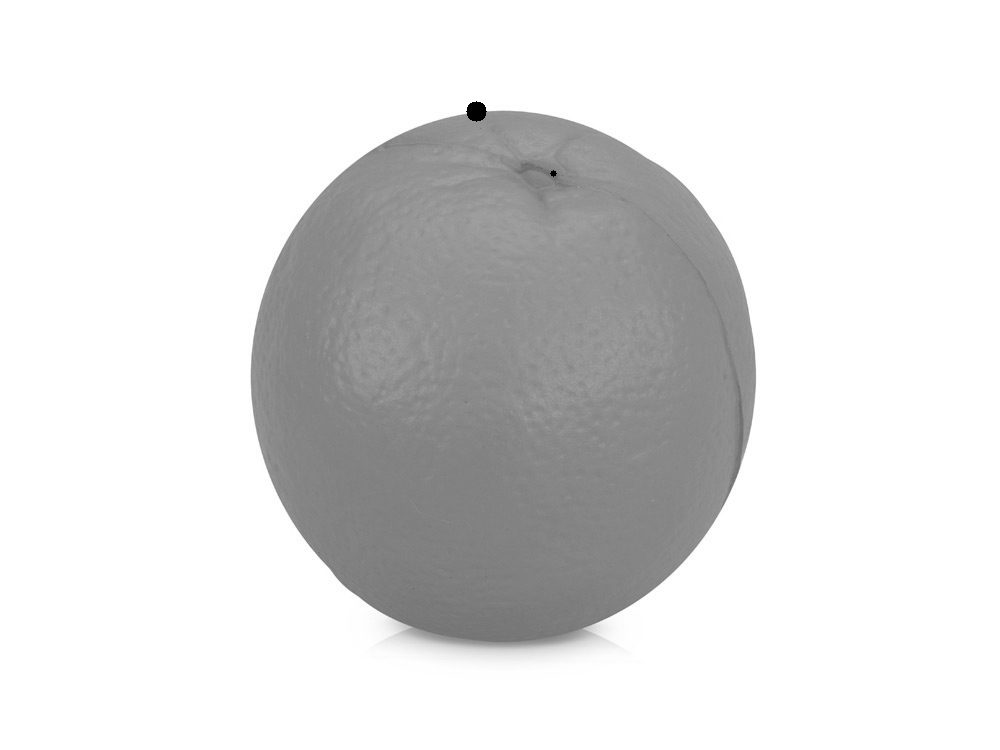

In [18]:
# min, max and locations
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(image.copy(), mask=mask)
print(min_val, max_val)
print(min_loc, max_loc)

image_with_points = cv2.circle(image.copy(), min_loc, 3, 0, -1)
image_with_points = cv2.circle(image_with_points, max_loc, 10, 0, -1)

Image.fromarray(image_with_points)

In [19]:
# mean values in mask
mean_val = cv2.mean(image.copy(), mask=mask)[0]
print(mean_val)

139.83742523072328


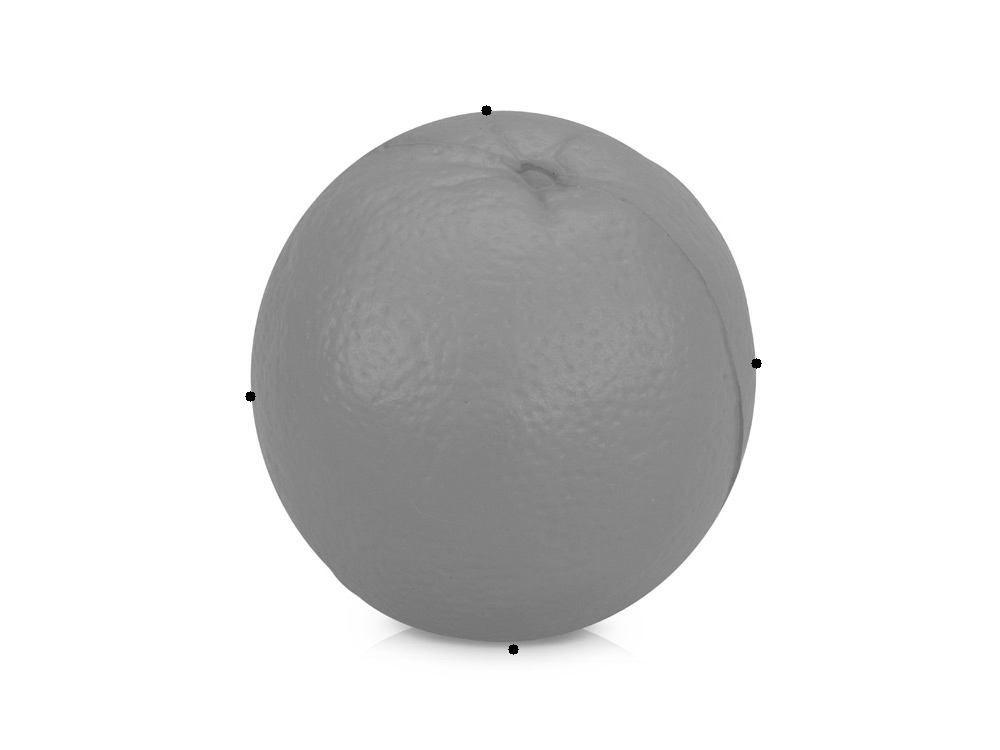

In [20]:
# Extreme points
left = tuple(contour[contour[:,:,0].argmin()][0])
right = tuple(contour[contour[:,:,0].argmax()][0])
top = tuple(contour[contour[:,:,1].argmin()][0])
bottom = tuple(contour[contour[:,:,1].argmax()][0])

image_with_extreme = image.copy()
image_with_extreme = cv2.circle(image_with_extreme, left, 5, 0, -1)
image_with_extreme = cv2.circle(image_with_extreme, right, 5, 0, -1)
image_with_extreme = cv2.circle(image_with_extreme, bottom, 5, 0, -1)
image_with_extreme = cv2.circle(image_with_extreme, top, 5, 0, -1)
Image.fromarray(image_with_extreme)

# More functions

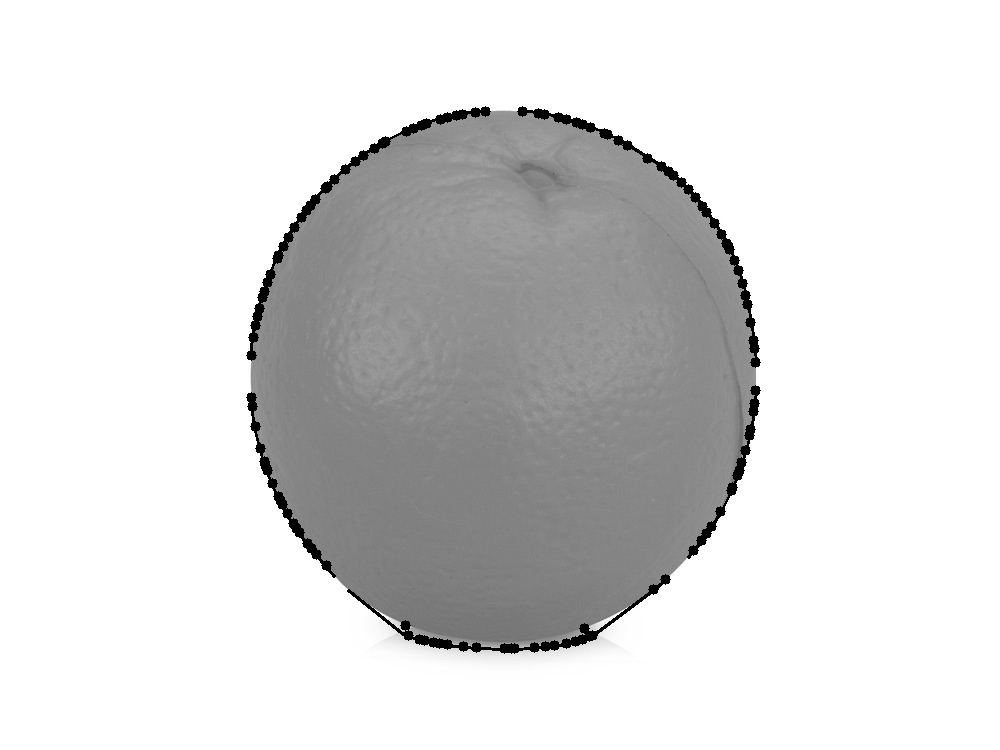

In [21]:
# convexity defects, result strange)
contour_hull = cv2.convexHull(contour, returnPoints=False)
defects = cv2.convexityDefects(contour, contour_hull)

image_with_defects = image.copy()
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(contour[s][0])
    end = tuple(contour[e][0])
    far = tuple(contour[f][0])
    _ = cv2.line(image_with_defects, start, end, 0, 2)
    _ = cv2.circle(image_with_defects, far, 5, 0, -1)
Image.fromarray(image_with_defects)

In [22]:
# polygon test and distance
# for fun see `src/polygon_test.py`
distance_outer = cv2.pointPolygonTest(contour, (10, 10), True)
print(distance_outer)
distance_inner = cv2.pointPolygonTest(contour, (image.shape[0] // 2, image.shape[1] // 2), True)
print(distance_inner)

-356.4323217666995
79.98124780221924


# Match shapes

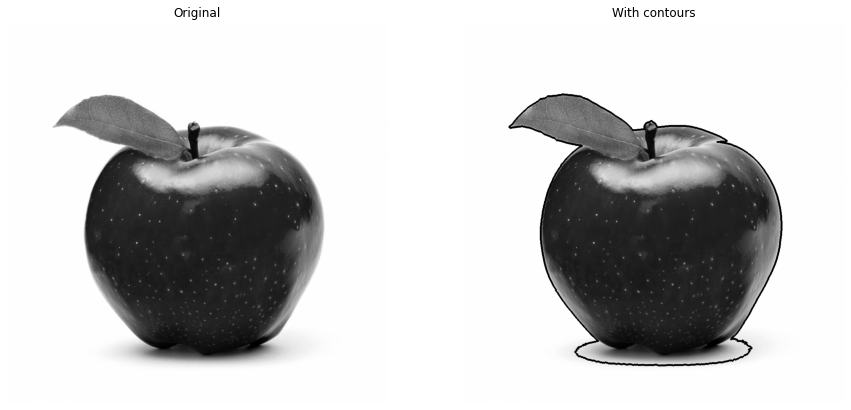

In [23]:
# read apple image

image_apple = cv2.imread(path.join(DATA_PATH, "apple.jpg"), 0)
ret, image_apple_binary = cv2.threshold(image_apple, 230, 255, cv2.THRESH_BINARY)

contours_apple, _ = cv2.findContours(image_apple_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = cv2.drawContours(image_apple.copy(), contours_apple, 2, (0,), 3)
contour_apple = contours_apple[2]

plot_images([image_apple, image_with_contours], names=["Original", "With contours"],
            figsize=(15, 10), imshow_kwargs={"cmap": plt.cm.gray}
           )

`Distance` between apple and orenage = 0.14074361532309243


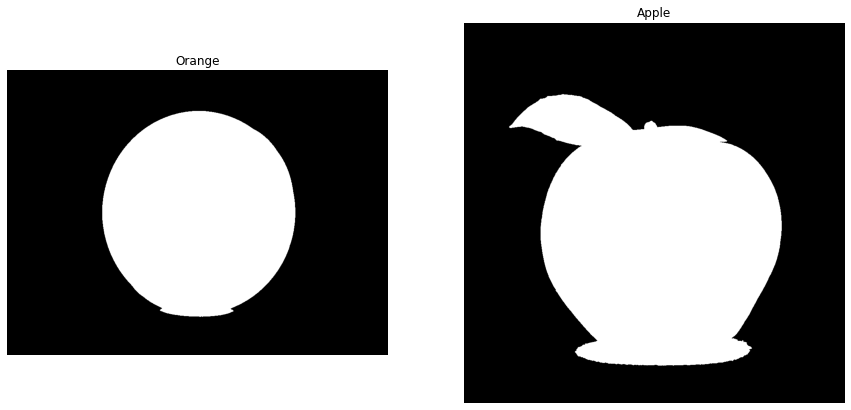

In [24]:
print(f"`Distance` between apple and orenage = {cv2.matchShapes(contour, contour_apple, 1, 0)}")

mask_orange = np.zeros_like(image, np.uint8)
mask_orange = cv2.drawContours(mask_orange, [contour], -1, 255, -1)

mask_apple = np.zeros_like(image_apple, np.uint8)
mask_apple = cv2.drawContours(mask_apple, [contour_apple], -1, 255, -1)

plot_images([mask_orange, mask_apple], names=["Orange", "Apple"],
            figsize=(15, 10), imshow_kwargs={"cmap": plt.cm.gray}
           )